In [1]:
from flask import Flask, render_template, request
from joblib import load
import numpy as np
import pandas as pd
import re
from pathlib import Path
import datetime
import logging

### Determine paths to datasets and load into pandas dataframe
# test_folder = Path("../data/test")
processed_folder = Path("../data/processed/")
dictionaries = processed_folder / 'expanded_variable_dictionaries.joblib'
dict = load(dictionaries)


In [2]:
dict[0]['Rowling, J K']

23401

In [3]:
dict[1]['scholastic']

680251

In [4]:
print(dict[3])

{'LV_Braille': 99, 'LV_Documentaire A': 4218963, 'LV_Documentaire J': 3593964, 'LV_Fiction A': 8752779, 'LV_Fiction J': 14010164, 'LV_Gros caractères A': 218246, 'LV_Gros caractères J': 194, 'LV_Location': 20, 'LV_Référence A': 14789, 'LV_Référence J': 8735}


In [6]:
### Understanding clusters
file_to_open = processed_folder / 'feature_labels_for_each_title.csv'
df = pd.read_csv(file_to_open)

df.head()

,Unnamed: 0,Auteur_labels,Editeur_labels,Pays_labels,Years_offset,Document_type_labels,Language_type_labels,Demand
0,0,26.0,7185.0,325471.0,41.0,0.0,0.0,0.0
1,1,1466.0,116130.0,2378036.0,20.0,1.0,0.0,0.0
2,2,1789.0,116130.0,325471.0,17.0,1.0,0.0,0.0
3,3,1789.0,116130.0,325471.0,17.0,1.0,0.0,0.0
4,4,1789.0,116130.0,78045.0,26.0,1.0,0.0,0.0


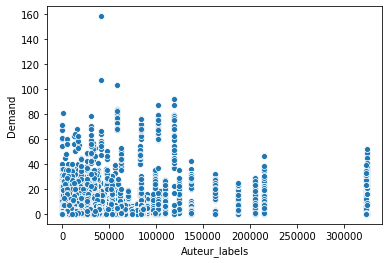

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(df['Auteur_labels'],df['Demand'])

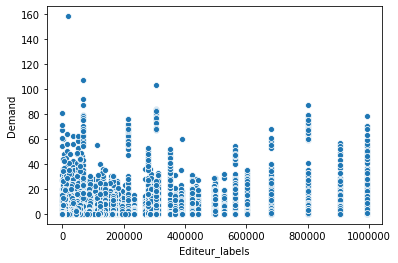

In [8]:
sns.scatterplot(df['Editeur_labels'],df['Demand'])

In [9]:
cleaned_folder = Path("../data/cleaned")
cleaned_data = cleaned_folder / 'by_titles.csv'

df1 = pd.read_csv(cleaned_data)

df1.head()

,ISN,Titre,Auteur,Editeur,Pays,Annee,Nombre-pages,Langue,Type-document,Lieu,Total,Available,Demanded,Lifetime
0,1033859,Segovia :,"Segovia, Andrés",collins,xxk,1979,64,eng,LV_Documentaire J,London,3,3.0,0.0,26
1,1361171,"One, two, guess who? /","Hawkins, Colin",harpercollins,xxu,2000,11,eng,LV_Fiction J,New York,1,1.0,0.0,8
2,1374354,When we play together /,"Butterworth, Nick",harpercollins,xxk,2003,1,eng,LV_Fiction J,London,1,1.0,0.0,7
3,1374362,When it's time for bed /,"Butterworth, Nick",harpercollins,xxk,2003,14,eng,LV_Fiction J,London,1,1.0,0.0,11
4,1374370,When there's work to do.,"Butterworth, Nick",harpercollins,enk,1994,14,eng,LV_Fiction J,London,1,1.0,0.0,10


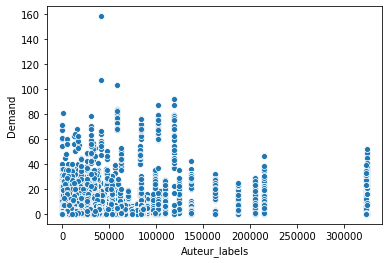

In [18]:
sns.scatterplot(df['Auteur_labels'],df['Demand'])

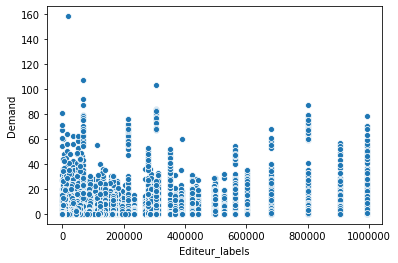

In [19]:
sns.scatterplot(df['Editeur_labels'],df['Demand'])

In [14]:
print(dict[2])

{'aa': 23, 'abc': 277, 'ae': 73, 'af': 7, 'ag': 231, 'alu': 2, 'an': 58, 'as': 2, 'at': 8674, 'au': 136, 'azu': 291, 'bcc': 410, 'be': 1948064, 'bg': 2, 'bl': 15, 'br': 14, 'cau': 8482, 'cc': 5179, 'ce': 1, 'ch': 1064, 'ck': 109, 'cl': 78, 'cm': 7, 'cou': 155, 'ctu': 313, 'dcu': 99, 'deu': 9, 'dk': 9, 'dm': 62, 'enk': 78045, 'fg': 14, 'fi': 15, 'flu': 186, 'fp': 80, 'fr': 17528526, 'ft': 337, 'gau': 183, 'gb': 63, 'gp': 479, 'gr': 173, 'gt': 18, 'gw': 52767, 'ht': 920, 'hu': 29, 'iau': 0, 'ic': 0, 'ie': 228, 'ii': 1005, 'ilu': 846, 'inu': 169, 'ir': 105, 'is': 54, 'it': 28971, 'iv': 0, 'ja': 1806, 'jm': 1, 'ko': 4, 'ksu': 17, 'lau': 12, 'le': 2558, 'lo': 3, 'lu': 831, 'mau': 2360, 'mbc': 114, 'mc': 114470, 'mdu': 49, 'meu': 901, 'mf': 14, 'miu': 225, 'mnu': 843, 'mou': 491, 'mq': 42, 'mr': 89, 'mx': 464, 'my': 10, 'na': 29, 'nbu': 36, 'ncu': 134, 'ne': 1391, 'nfc': 18, 'nju': 649, 'nkc': 247, 'nl': 21, 'nsc': 55, 'ntc': 5, 'nuc': 9, 'nvu': 128, 'nyu': 63847, 'nz': 633, 'ohu': 271, 'oku

In [15]:
print(dict[4])

{'aar': 861, 'ang': 12, 'ara': 1099, 'bad': 57, 'ben': 22, 'bik': 1, 'chi': 4308, 'cpe': 11, 'cpf': 143, 'cze': 3, 'dak': 574, 'dut': 20, 'efi': 60, 'eng': 3222549, 'fan': 28, 'fin': 6, 'fre': 27562080, 'frm': 8, 'fro': 3, 'ger': 57, 'grc': 11, 'gre': 60, 'hai': 162, 'hat': 424, 'iku': 55, 'ind': 0, 'ita': 14809, 'jav': 78, 'jpn': 78, 'kaa': 107, 'lat': 65, 'mis': 0, 'mul': 229, 'paa': 168, 'pan': 14, 'per': 47, 'pol': 8, 'por': 18, 'que': 218, 'raj': 229, 'rum': 177, 'rus': 863, 'sad': 86, 'scc': 3, 'slo': 0, 'spa': 6221, 'ssa': 480, 'tah': 167, 'tgl': 696, 'tur': 15, 'udm': 136, 'und': 110, 'urd': 35, 'vai': 11, 'vie': 59, 'xal': 143, 'zxx': 69}


In [16]:
dict[0]['Proust, Marcel']

2878

In [17]:
dict[1]['gallimard']

525805